<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# !conda install folium --yes
# !pip install folium

# !pip install geopy

# # pygmaps

# !pip install gpxpy
# import gpxpy.geo


In [49]:
import folium
from folium import plugins

In [16]:
meta = pd.read_csv('./datasets/metadata.csv')

In [17]:
meta.head(5)

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [20]:
print meta.head(5)

print '\n Describe:'
print meta.describe()

print '\n Cell Tower Location:'
print meta['Cell Tower Location'].unique()

print '\n Comm Type:'
print meta['Comm Type'].unique()

meta['Comm Timedate String'][0:2]

        Cell Cgi Cell Tower Location  \
0  50501015388B9          REDFERN TE   
1  50501015388B9          REDFERN TE   
2  505010153111F         HAYMARKET #   
3  505010153111F         HAYMARKET #   
4      5.05E+106         HAYMARKET #   

                            Comm Identifier Comm Timedate String Comm Type  \
0  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e          4/1/14 9:40     Phone   
1  62157ccf2910019ffd915b11fa037243b75c1624          4/1/14 9:42     Phone   
2  c8f92bd0f4e6fb45ed7fce96fc831b283db2b642         4/1/14 13:13     Phone   
3  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 13:13     Phone   
4  f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e         4/1/14 17:27     Phone   

    Latitude   Longitude  
0 -33.892933  151.202296  
1 -33.892933  151.202296  
2 -33.880329  151.205690  
3 -33.880329  151.205690  
4 -33.880329  151.205690  

 Describe:
           Latitude     Longitude
count  10476.000000  10476.000000
mean     -35.136188    150.612841
std        3.1

0    4/1/14 9:40
1    4/1/14 9:42
Name: Comm Timedate String, dtype: object

In [27]:
meta['comm_date'] = meta['Comm Timedate String'].str.slice(0,6)

In [37]:
meta['comm_time'] = meta['Comm Timedate String'].str.slice(7,12)

In [58]:
meta_no_nan = meta.dropna()

In [108]:
meta_no_nan

,index,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,comm_date,comm_time
0,0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296,4/1/14,9:40
1,1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296,4/1/14,9:42
2,2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690,4/1/14,13:13
3,3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690,4/1/14,13:13
4,4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690,4/1/14,17:27
5,5,5050101532B23,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:36,Phone,-33.884171,151.202350,4/1/14,17:36
6,6,5050101536E5E,CHIPPENDALE,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,4/1/14 17:40,Phone,-33.884171,151.202350,4/1/14,17:40
7,7,5050101531F08,REDFERN TE,7cb96eadd3ff95e25406d24794027c443c0661c5,4/2/14 19:18,Phone,-33.892933,151.202296,4/2/14,19:18
8,8,505010153111F,HAYMARKET #,de40c5c1f9249f95f7fb216931db58747afef74f,4/3/14 14:35,Phone,-33.880329,151.205690,4/3/14,14:35
9,9,505010153111F,HAYMARKET #,66f32c1163d0e597983b65c51f5a477070ad3785,4/3/14 14:36,Phone,-33.880329,151.205690,4/3/14,14:36


In [105]:
new_df = meta_no_nan.groupby('Cell Tower Location').count()
new_df.sort_values(by='Latitude', ascending=False)

,index,Cell Cgi,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,comm_date,comm_time
Cell Tower Location,,,,,,,,,
REDFERN TE,392,392,392,392,392,392,392,392,392
BALGOWLAH HAYES ST,372,372,372,372,372,372,372,372,372
HAYMARKET #,159,159,159,159,159,159,159,159,159
CHIPPENDALE,103,103,103,103,103,103,103,103,103
HARBORD 22 WAINE ST,57,57,57,57,57,57,57,57,57
CHINATOWN,38,38,38,38,38,38,38,38,38
FAIRLIGHT 137 SYDNEY RD,35,35,35,35,35,35,35,35,35
SURRY HILLS 418A ELIZABETH ST,20,20,20,20,20,20,20,20,20
SUNDERLAND ST,19,19,19,19,19,19,19,19,19


In [64]:
l_l = meta_no_nan[['Latitude','Longitude']]


In [71]:
locations = meta_no_nan[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)


1374

In [84]:
meta_no_nan.reset_index(inplace = True)

In [87]:
map = folium.Map(location=[-33.892933, 151.202296], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=meta_no_nan['comm_date'][point]).add_to(map)
map

In [95]:
map2 = folium.Map(location=[-33.892933, 151.202296], tiles='CartoDB dark_matter', zoom_start=11)

folium.Marker

marker_cluster = folium.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_counters['Comm Type'][point]).add_to(marker_cluster)
map2

AttributeError: 'module' object has no attribute 'MarkerCluster'

In [132]:
map = folium.Map(location=[-33.892933, 151.202296], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.plugins.heat_map
map

TypeError: 'module' object is not callable

In [131]:

map6 = folium.Map(location=[-33.78815, 151.26654], zoom_start=12)
folium.Marker([-33.78815, 151.26654]).add_to(map6)
folium.Marker([-33.89293336, 151.2022962]).add_to(map6)
folium.Marker([-33.78815, 151.26654]).add_to(map6)
folium.Marker([-33.88032891, 151.2056904]).add_to(map6)
folium.Marker([-33.88417103, 151.20235]).add_to(map6)
# folium.Marker([-33.779333, 151.276901]).add_to(map5)
# folium.Marker([-33.87829, 151.20345]).add_to(map5)
# folium.Marker([-33.79661, 151.27756]).add_to(map5)
# folium.Marker([-33.8864, 151.2088]).add_to(map5)
# folium.Marker([-42.84338, 147.29569]).add_to(map5)
map6

In [121]:
meta['LatLong'] = list(zip(meta.Latitude,meta.Longitude))
phone_sms = meta[meta['Comm Type'].isin(['Phone','SMS'])]

In [138]:
top_df = phone_sms['Cell Tower Location'].value_counts()

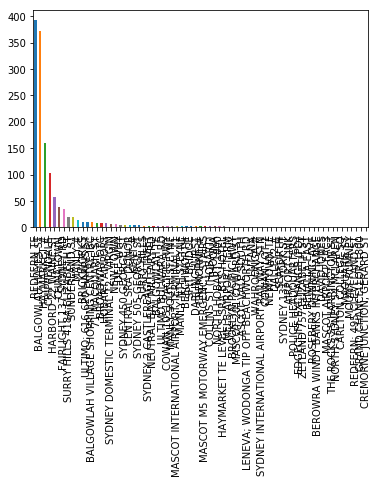

In [139]:
top_df.plot.bar()

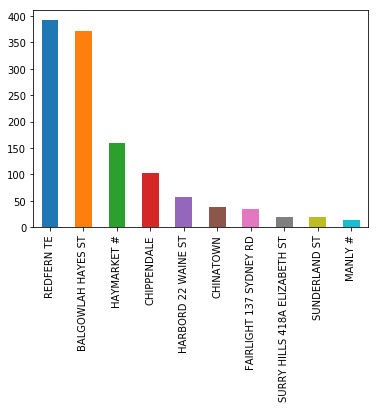

In [141]:
top_df_n = top_df.head(10)
top_df_n.plot.bar()